In [1]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


### Training Image Preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Image Processing


In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[ 98.25  89.    91.25]
   [ 87.25  78.25  80.25]
   [ 85.    74.25  78.  ]
   ...
   [ 83.5   73.25  71.75]
   [ 84.    73.75  72.25]
   [ 89.5   79.25  77.75]]

  [[155.5  144.5  148.5 ]
   [168.   157.   161.  ]
   [179.5  168.5  172.5 ]
   ...
   [155.25 144.25 142.25]
   [160.75 149.75 147.75]
   [169.   158.   156.  ]]

  [[176.   165.   169.  ]
   [142.   131.   135.  ]
   [165.   154.   158.  ]
   ...
   [164.75 150.75 149.75]
   [180.5  166.5  165.5 ]
   [173.25 159.25 158.25]]

  ...

  [[187.75 181.75 183.75]
   [190.   184.   186.  ]
   [206.   200.   202.  ]
   ...
   [166.   152.   152.  ]
   [178.   164.   164.  ]
   [177.5  163.5  163.5 ]]

  [[195.5  189.5  191.5 ]
   [194.75 188.75 190.75]
   [205.25 199.25 201.25]
   ...
   [170.75 156.75 156.75]
   [178.25 164.25 164.25]
   [178.25 164.25 164.25]]

  [[184.75 178.75 180.75]
   [196.25 190.25 192.25]
   [198.   192.   194.  ]
   ...
   [183.   169.   169.  ]
   [169.25 155.25 155.25]
   [176.75 162.75 16

## Building Model


## to avoid overshooting
1. choose small learning rate default 0.001 we are taking 0.0001
2. there may be chance of underfitting , increase no of neurons
3. add more convolutional layer to extract more feature from images there may be possibility model is confusing due to lack of feature so feed with more feature

In [46]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [47]:
model = Sequential()

## Building Layer

In [48]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [49]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [50]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [54]:
model.add(Dropout(0.25))

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(units=1500,activation='relu'))

In [57]:
model.add(Dropout(0.4))

In [58]:
## output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling model

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## model training

In [62]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3426s 2s/step - accuracy: 0.4065 - loss: 2.1058 - val_accuracy: 0.8437 - val_loss: 0.4964
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3464s 2s/step - accuracy: 0.8362 - loss: 0.5238 - val_accuracy: 0.8817 - val_loss: 0.3788
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3374s 2s/step - accuracy: 0.9062 - loss: 0.2908 - val_accuracy: 0.9243 - val_loss: 0.2297
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4199s 2s/step - accuracy: 0.9328 - loss: 0.2029 - val_accuracy: 0.9480 - val_loss: 0.1581
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4880s 2s/step - accuracy: 0.9522 - loss: 0.1429 - val_accuracy: 0.9548 - val_loss: 0.1349
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4074s 2s/step - accuracy: 0.9630 - loss: 0.1127 - val_accuracy: 0.9591 - val_loss: 0.1196
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4222s 2s/step - accuracy: 0.9723 - loss: 0.0877 - val_accuracy: 0.9595 - val_loss: 0.1294
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3497s 2s/step - accuracy: 0.9747 -

## model evaluation


In [63]:
#evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 900s 408ms/step - accuracy: 0.9929 - loss: 0.0241


In [64]:
print(train_loss,train_acc)


0.023144854232668877 0.9929582476615906


In [65]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 353s 639ms/step - accuracy: 0.9703 - loss: 0.0969


In [66]:
print(val_loss,val_acc)

0.0973958671092987 0.9701798558235168


## saving model


In [68]:
model.save("trained_model.keras")

In [69]:
training_history.history

{'accuracy': [0.6022334694862366,
  0.858752429485321,
  0.9158973097801208,
  0.939184844493866,
  0.9553310871124268,
  0.9647912383079529,
  0.9728003144264221,
  0.9753040671348572,
  0.9804964661598206,
  0.9820755124092102],
 'loss': [1.3486835956573486,
  0.4483242630958557,
  0.2633760869503021,
  0.18436799943447113,
  0.1371021270751953,
  0.1072854995727539,
  0.0844394639134407,
  0.07360072433948517,
  0.060738131403923035,
  0.056587040424346924],
 'val_accuracy': [0.8437286615371704,
  0.8817436695098877,
  0.9243113994598389,
  0.9479854106903076,
  0.9548144936561584,
  0.9591395258903503,
  0.9594810009002686,
  0.969041645526886,
  0.9646027684211731,
  0.9701798558235168],
 'val_loss': [0.49636539816856384,
  0.37883082032203674,
  0.22969572246074677,
  0.15809616446495056,
  0.13491684198379517,
  0.11960567533969879,
  0.12942849099636078,
  0.09968064725399017,
  0.11496497690677643,
  0.0973958969116211]}

In [70]:
## recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [74]:
training_history.history['val_accuracy']

[0.8437286615371704,
 0.8817436695098877,
 0.9243113994598389,
 0.9479854106903076,
 0.9548144936561584,
 0.9591395258903503,
 0.9594810009002686,
 0.969041645526886,
 0.9646027684211731,
 0.9701798558235168]

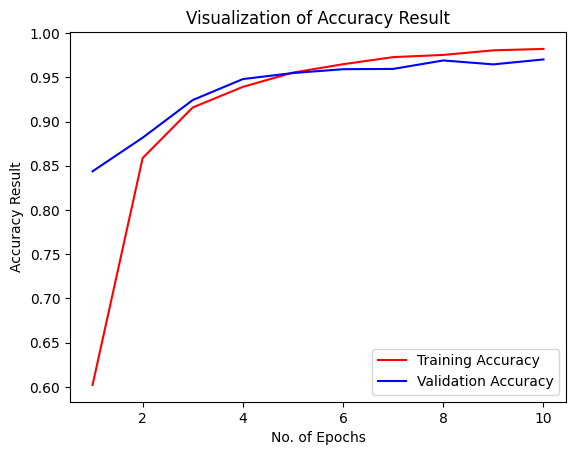

In [79]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## some other metrics for model evaluation

In [81]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [82]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [84]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 225s 406ms/step


In [85]:
y_pred,y_pred.shape

(array([[9.99791563e-01, 6.02810796e-05, 1.09440165e-07, ...,
         1.50222560e-11, 9.27120186e-11, 2.82782797e-10],
        [6.07259512e-01, 3.92117381e-01, 1.07192463e-05, ...,
         1.97106989e-08, 2.63887500e-07, 6.50210609e-07],
        [9.97349143e-01, 2.63167894e-03, 1.60498796e-08, ...,
         6.64195676e-15, 8.60870472e-11, 7.37203243e-10],
        ...,
        [2.74259476e-10, 1.85250634e-11, 6.39974687e-08, ...,
         5.01255912e-11, 3.97686467e-11, 9.99998450e-01],
        [1.81247267e-10, 2.35431084e-11, 6.47913012e-08, ...,
         3.48360507e-10, 2.35028774e-10, 9.99999046e-01],
        [1.49494168e-17, 4.13508705e-18, 1.00890968e-13, ...,
         3.56616422e-18, 1.09043686e-15, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [86]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [88]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [89]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [90]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [91]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.89      0.94       504
                                 Apple___Black_rot       0.90      1.00      0.95       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.98      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.91      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [96]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[450,  24,   1, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 476]])

In [97]:
cm.shape


(38, 38)

## confusion matrix visualization

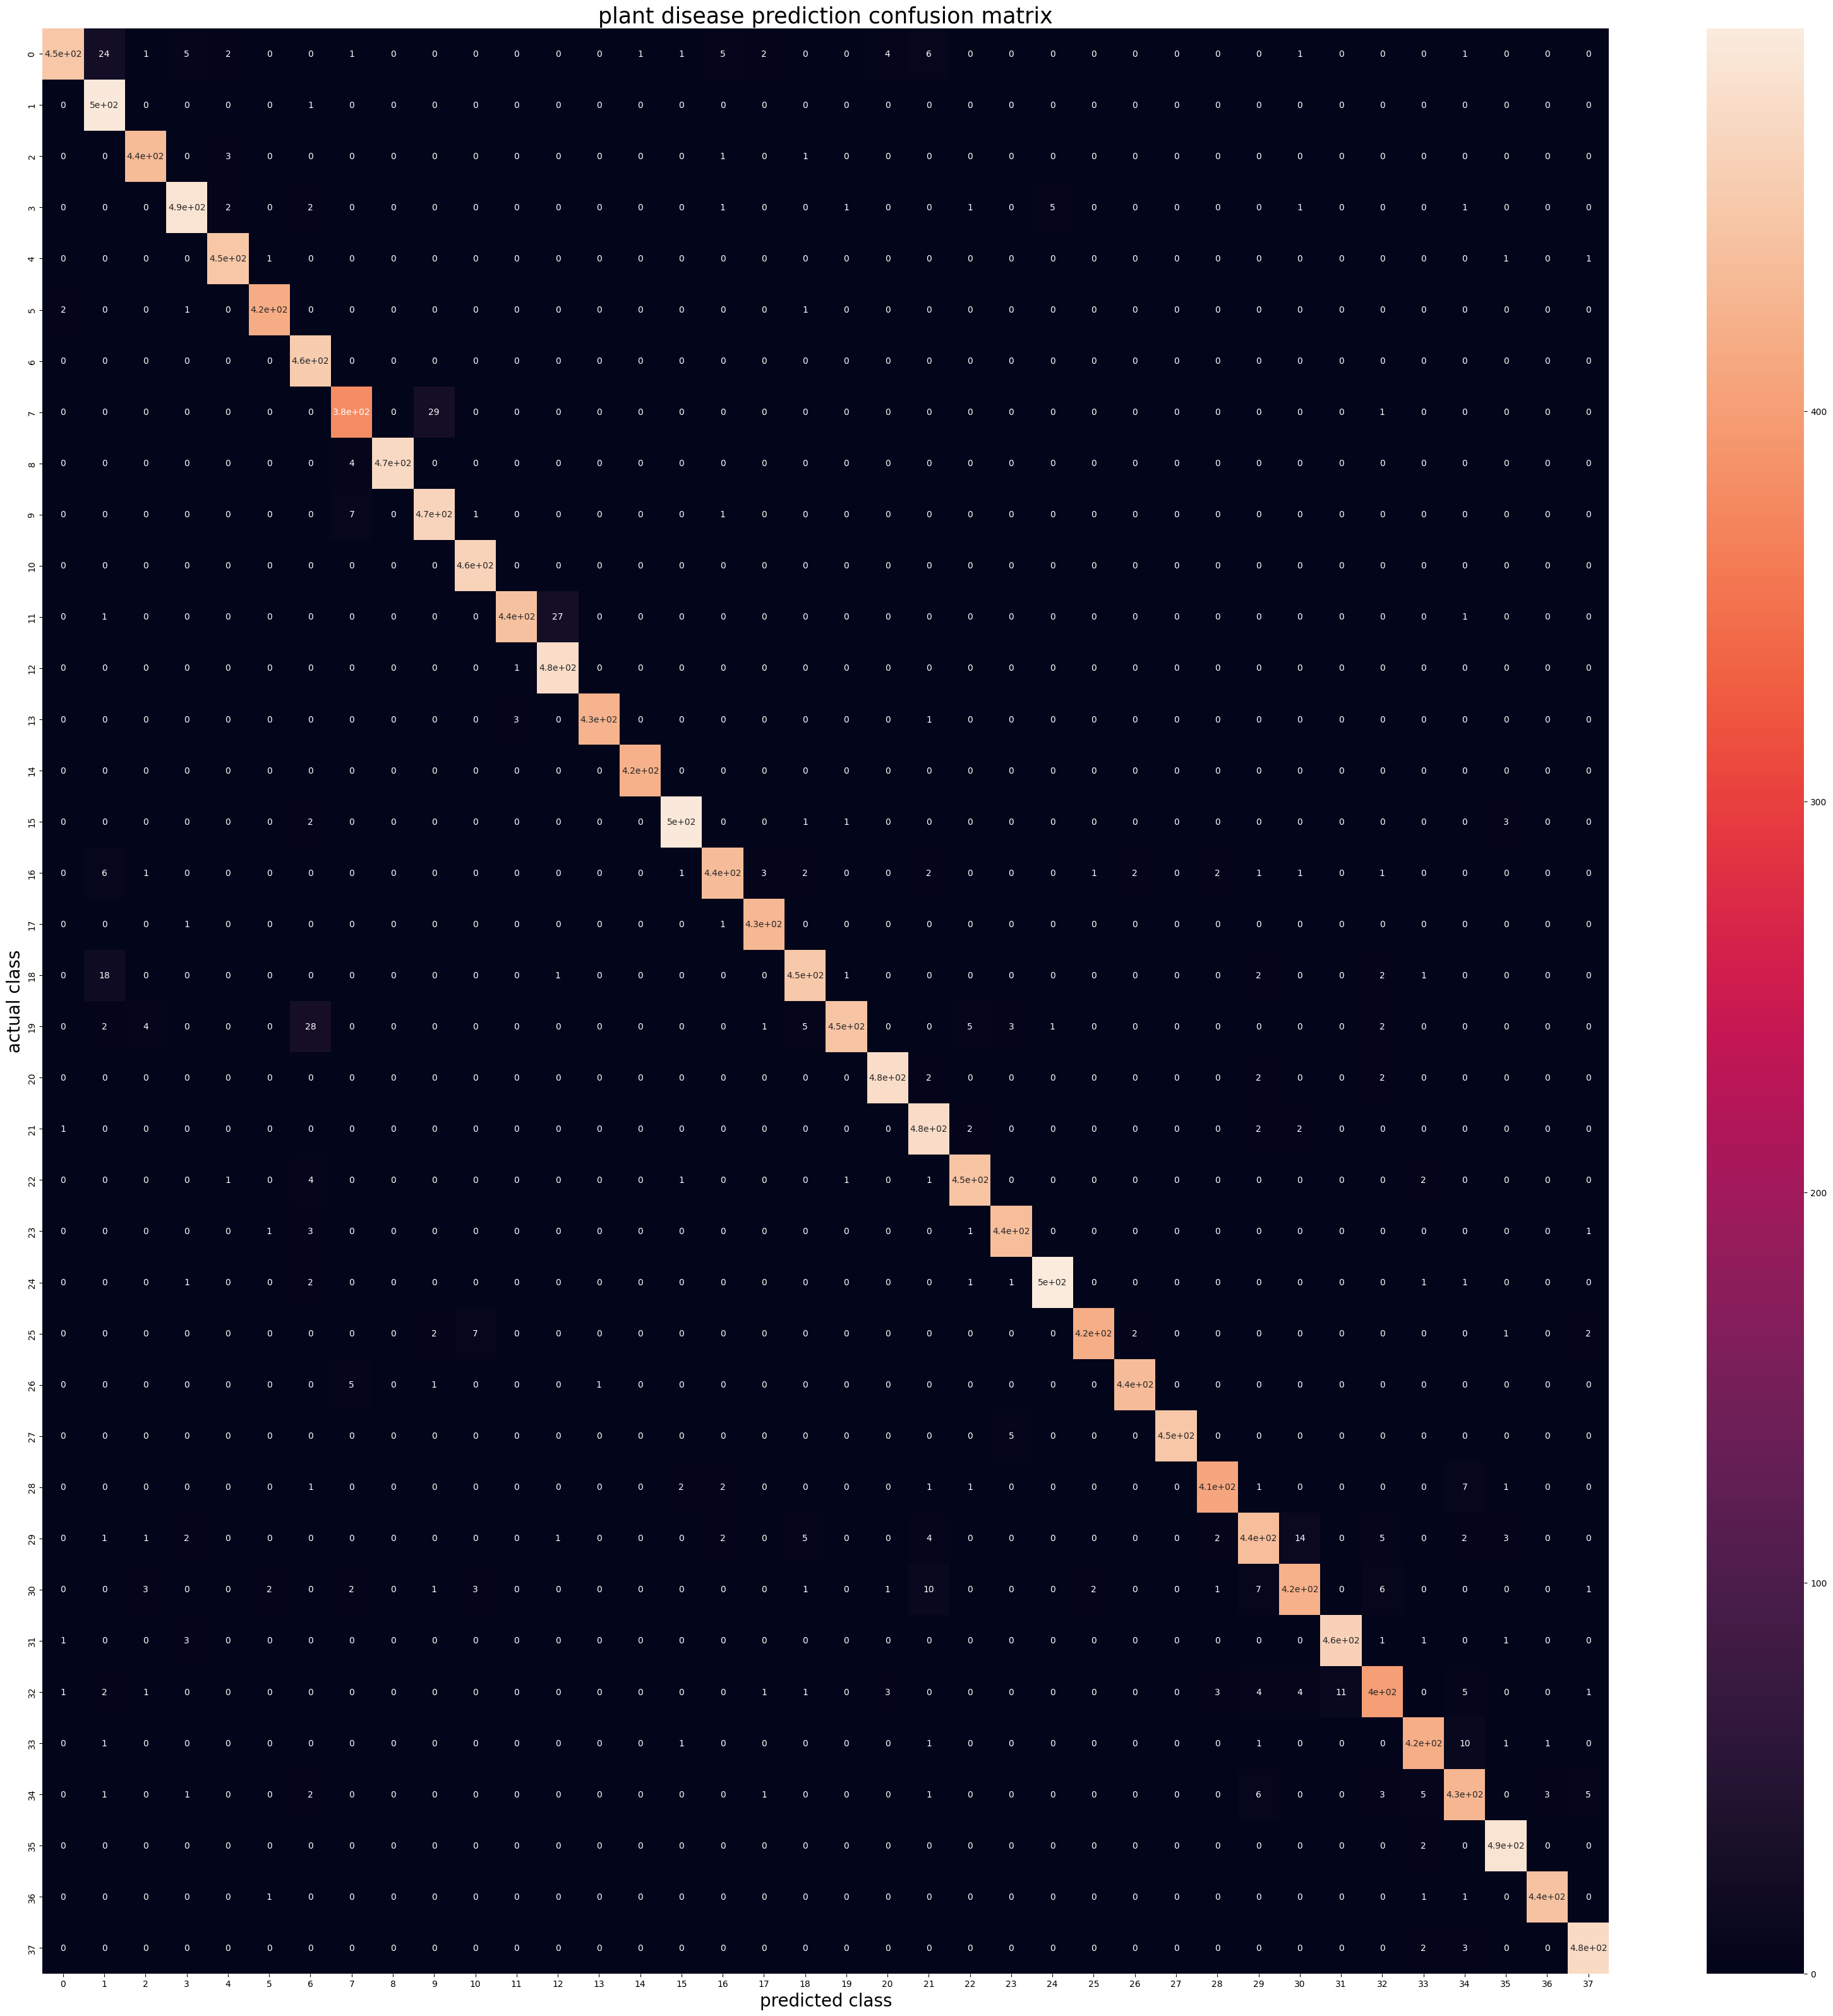

In [104]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("plant disease prediction confusion matrix",fontsize=25)
plt.show()